In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv", encoding='utf-8', on_bad_lines='skip')


In [3]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape


(51717, 17)

In [5]:
df.columns
drop_columns_list=['url','phone','address', 'menu_item']
df.drop(drop_columns_list,axis=1,inplace=True)

In [6]:
df.shape


(51717, 13)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

In [8]:
df.isna().sum()


name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.drop("dish_liked",axis=1,inplace=True)
df.shape


(51717, 12)

In [10]:
df.isna().sum()


name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
df.drop("reviews_list",axis=1,inplace=True)


In [12]:
import re

# Edit the code to retain numbers, '/', '-', letters, and spaces while removing unwanted characters
df['name'] = df['name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9/\s-]', '', x) if isinstance(x, str) else x)


In [13]:
df.isna().sum()


name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [14]:
df.head(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [15]:
df['rate'] = df['rate'].replace(['NEW', 'NAN', ''], '0')  # Replace 'NEW', 'NAN', and empty strings with '0'
df['rate'] = df['rate'].str.split('/').str[0].str.strip()  # Keep only the part before '/'
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to numeric, invalid values become NaN
df['rate'] = df['rate'].fillna(0)  # Fill NaN values with 0



df['rate']=df['rate'].fillna(0)

In [16]:
df.iloc[10]


name                           Caf Down The Alley
online_order                                  Yes
book_table                                     No
rate                                          4.1
votes                                         402
location                             Banashankari
rest_type                                    Cafe
cuisines                                     Cafe
approx_cost(for two people)                   500
listed_in(type)                             Cafes
listed_in(city)                      Banashankari
Name: 10, dtype: object

In [17]:
df.isna().sum()


name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [18]:
df.iloc[10]


name                           Caf Down The Alley
online_order                                  Yes
book_table                                     No
rate                                          4.1
votes                                         402
location                             Banashankari
rest_type                                    Cafe
cuisines                                     Cafe
approx_cost(for two people)                   500
listed_in(type)                             Cafes
listed_in(city)                      Banashankari
Name: 10, dtype: object

In [19]:
# Step 1: Remove commas from 'approx_cost(for two people)'
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace({',': ''}, regex=True)

# Step 2: Convert the cleaned column to integers and create a new column 'price'
df['price'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce').fillna(0).astype(int)

# Step 3: Drop the original 'approx_cost(for two people)' column
df.drop(columns=['approx_cost(for two people)'], inplace=True)


# Show the cleaned DataFrame
print(df.head())


                    name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                        cuisines listed_in(type)  \
0        Casual Dining  North Indian, Mughlai, Chinese          Buffet   
1        Casual Dining     Chinese, North Indian, Thai          Buffet   
2  Cafe, Casual Dining          Cafe, Mexican, Italian          Buffet   
3          Quick Bites      South Indian, North Indian          Buffet   
4        Casual Dining        North Indian, Rajasthani          Buffet   

  listed_in(city)  price  
0    Banashankari    800  
1    Banashankari    800  

In [20]:
# Map 'Yes' to 1 and 'No' to 0 for both columns
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

# Confirm the changes
print(df[['book_table', 'online_order']].head())


   book_table  online_order
0           1             1
1           0             1
2           0             1
3           0             0
4           0             0


In [21]:
import pandas as pd
import numpy as np
from scipy import stats  # Ensure you import th

# Z-score method:
z_scores = stats.zscore(df['rate'].dropna())  # drop NA values for Z-score calculation
abs_z_scores = np.abs(z_scores)
outliers_z = df['rate'][abs_z_scores > 3]

# IQR method:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df['rate'][(df['rate'] < lower_bound) | (df['rate'] > upper_bound)]

# Display outliers detected by both methods
print("Outliers based on Z-score method:")
print(outliers_z)

print("\nOutliers based on IQR method:")
print(outliers_iqr)


Outliers based on Z-score method:
Series([], Name: rate, dtype: float64)

Outliers based on IQR method:
72       0.0
75       0.0
84       0.0
90       0.0
91       0.0
        ... 
51644    0.0
51675    0.0
51710    0.0
51713    0.0
51714    0.0
Name: rate, Length: 10052, dtype: float64


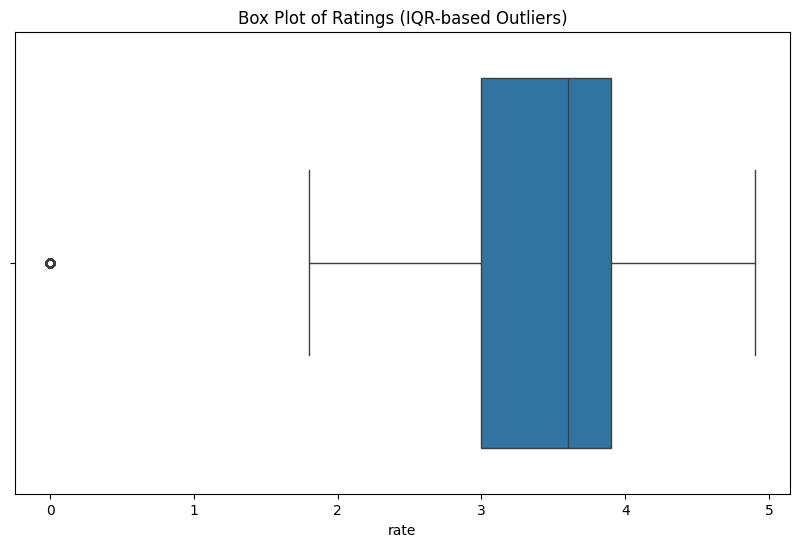

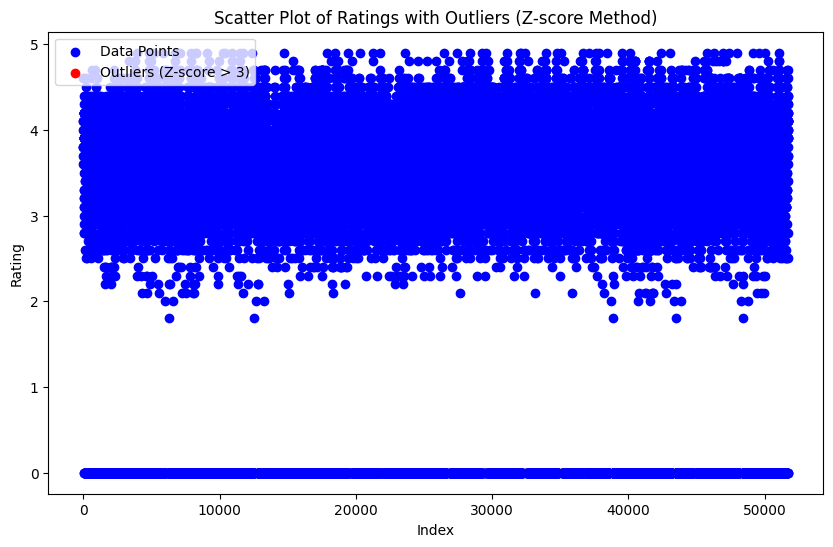

In [22]:

# Box plot (IQR method)
plt.figure(figsize=(10,6))
sns.boxplot(x=df['rate'])
plt.title("Box Plot of Ratings (IQR-based Outliers)")
plt.show()

# Z-score method for detecting outliers
mean_rate = df['rate'].mean()
std_rate = df['rate'].std()
z_scores = (df['rate'] - mean_rate) / std_rate
abs_z_scores = np.abs(z_scores)

# Scatter plot (Z-score method)
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['rate'], color='blue', label='Data Points')

# Highlight outliers detected by Z-score method
outliers_z = df['rate'][abs_z_scores > 3]
plt.scatter(outliers_z.index, outliers_z, color='red', label='Outliers (Z-score > 3)')

plt.title("Scatter Plot of Ratings with Outliers (Z-score Method)")
plt.xlabel("Index")
plt.ylabel("Rating")
plt.legend()
plt.show()


In [23]:
df_cleaned = df[df['rate'] != 0]
print(f"Number of rows before dropping: {len(df)}")
print(f"Number of rows after dropping: {len(df_cleaned)}")

Number of rows before dropping: 51717
Number of rows after dropping: 41665


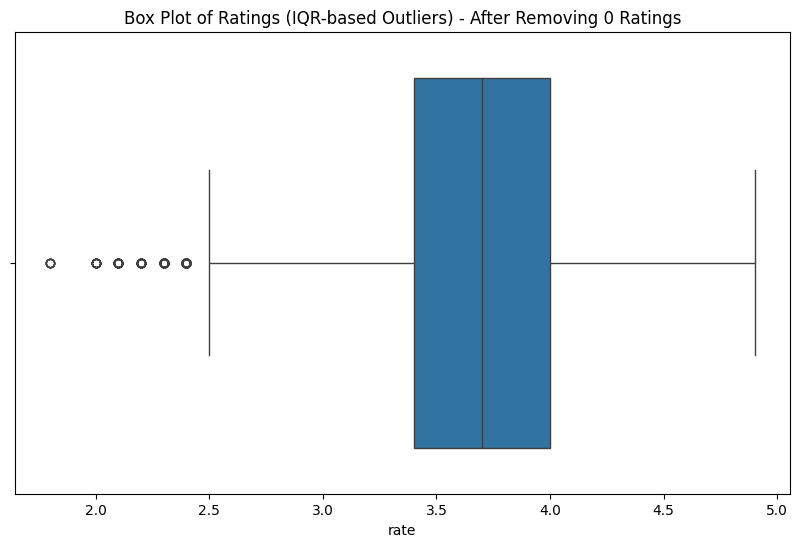

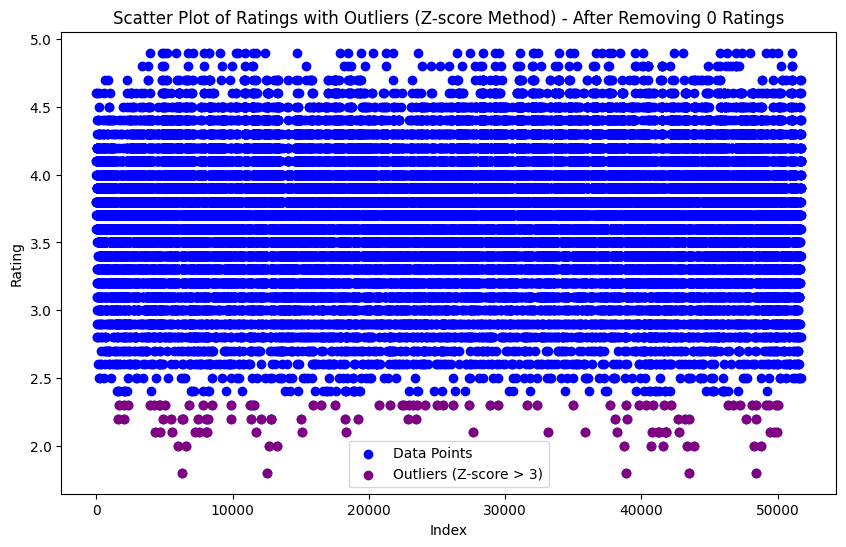

In [24]:



# Box plot (IQR method)
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['rate'])
plt.title("Box Plot of Ratings (IQR-based Outliers) - After Removing 0 Ratings")
plt.show()

# Z-score method for detecting outliers
mean_rate = df_cleaned['rate'].mean()
std_rate = df_cleaned['rate'].std()
z_scores = (df_cleaned['rate'] - mean_rate) / std_rate
abs_z_scores = np.abs(z_scores)

# Scatter plot (Z-score method)
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned.index, df_cleaned['rate'], color='blue', label='Data Points')

# Highlight outliers detected by Z-score method
outliers_z = df_cleaned['rate'][abs_z_scores > 3]
plt.scatter(outliers_z.index, outliers_z, color='purple', label='Outliers (Z-score > 3)')

plt.title("Scatter Plot of Ratings with Outliers (Z-score Method) - After Removing 0 Ratings")
plt.xlabel("Index")
plt.ylabel("Rating")
plt.legend()
plt.show()


In [25]:
df.to_csv('plsSavee.csv', index=False)

*Which cuisines receive the highest ratings, and does this vary by city or region?*

In [26]:

# Step 1: Explode cuisines if there are multiple cuisines in a single row
df_cleaned['cuisines'] = df_cleaned['cuisines'].str.split(',')  # If cuisines are separated by commas
df_exploded = df_cleaned.explode('cuisines')  # This will create a row for each cuisine

# Step 2: Aggregate data by location and cuisine (sum of votes)
cuisine_popularity = df_exploded.groupby(['location', 'cuisines'])['votes'].sum().reset_index()

# Step 3: Sort the cuisines by votes for each location
top_cuisines_per_location = cuisine_popularity.sort_values(by=['location', 'votes'], ascending=[True, False])

# Step 4: Get the most liked cuisine per location (the top cuisine)
top_cuisines_per_location = top_cuisines_per_location.groupby('location').head(1)

# Step 5: Sort the results from highest to lowest based on votes
top_cuisines_per_location = top_cuisines_per_location.sort_values(by='votes', ascending=False)

# Step 6: Output the result
print(top_cuisines_per_location[['location', 'cuisines', 'votes']])


                   location       cuisines   votes
2205  Koramangala 5th Block   North Indian  562434
3488          Sarjapur Road   North Indian  294294
2120  Koramangala 4th Block        Italian  251223
1460            Indiranagar   North Indian  240465
39                      BTM   North Indian  218957
...                     ...            ...     ...
1266                 Hebbal        Chinese     224
1740               KR Puram        Chinese     201
4117              Yelahanka        Seafood     156
2854             Nagarbhavi        Chinese      10
3079                 Peenya        Chinese       5

[92 rows x 3 columns]


C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\2596015695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cuisines'] = df_cleaned['cuisines'].str.split(',')  # If cuisines are separated by commas


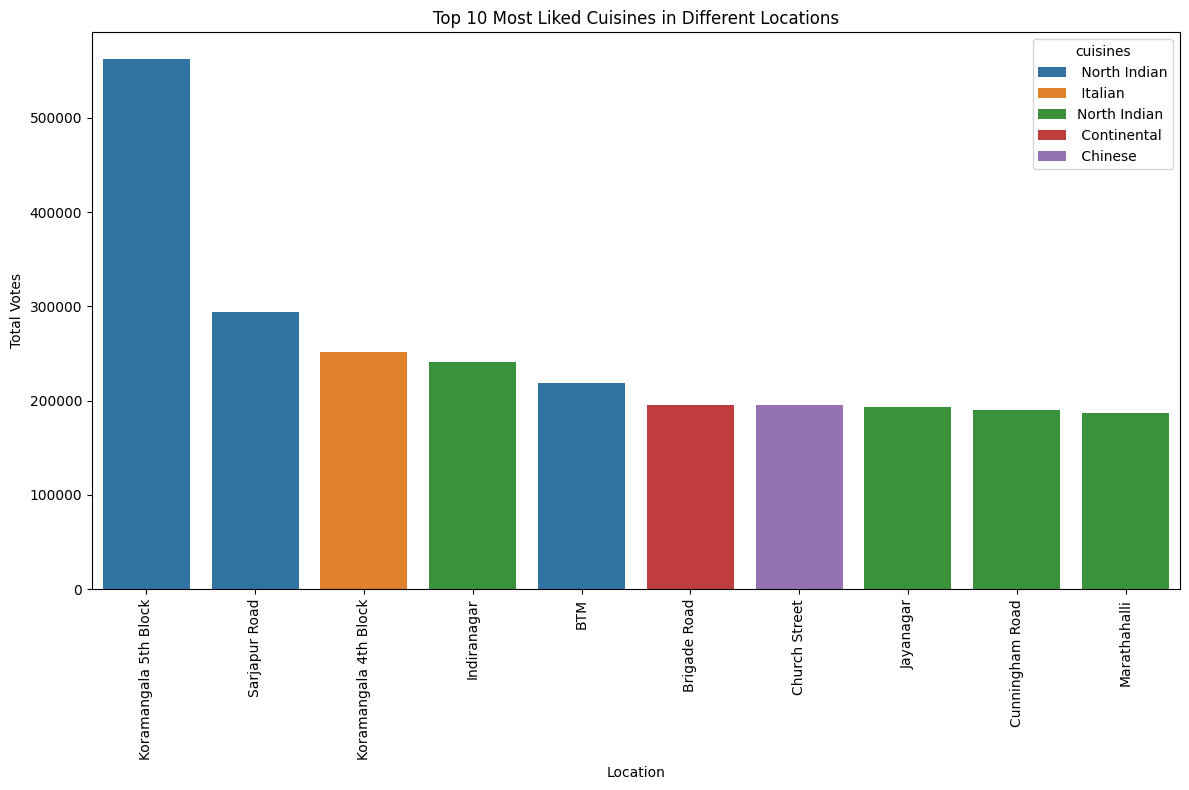

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and get the top 10 rows
top_10_cuisines = top_cuisines_per_location.nlargest(10, 'votes')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a barplot to visualize the most liked cuisines for the top 10 locations
sns.barplot(data=top_10_cuisines, x='location', y='votes', hue='cuisines', dodge=False)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.title('Top 10 Most Liked Cuisines in Different Locations')

# Show the plot
plt.tight_layout()
plt.show()


Is there a correlation between the variety of cuisines offered and the restaurant rating?

In [28]:

import pandas as pd

# Ensure 'rate' is treated as a string to extract numeric rating
df_cleaned['rate'] = df_cleaned['rate'].astype(str)

# Step 1: Extract the numeric part of the rating (e.g., '4.1' from '4.1/5')
df_cleaned['rating_numeric'] = df_cleaned['rate'].str.extract(r'(\d+\.\d+)').astype(float)

# Step 2: Ensure 'cuisines' column is a string and handle NaNs (fill NaNs with empty strings)
df_cleaned['cuisines'] = df_cleaned['cuisines'].fillna('')  # Replace NaNs with empty strings
df_cleaned['cuisines_count'] = df_cleaned['cuisines'].astype(str).str.split(',').apply(len)

# Step 3: Calculate the correlation between rating and number of cuisines
correlation = df_cleaned[['rating_numeric', 'cuisines_count']].corr()



C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\643160893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].astype(str)
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\643160893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rating_numeric'] = df_cleaned['rate'].str.extract(r'(\d+\.\d+)').astype(float)
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\643160893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [29]:
correlation

,rating_numeric,cuisines_count
rating_numeric,1.000000,0.206826
cuisines_count,0.206826,1.000000


C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\3907687627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].astype(str)
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\3907687627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rating_numeric'] = df_cleaned['rate'].str.extract(r'(\d+\.\d+)').astype(float)
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\3907687627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

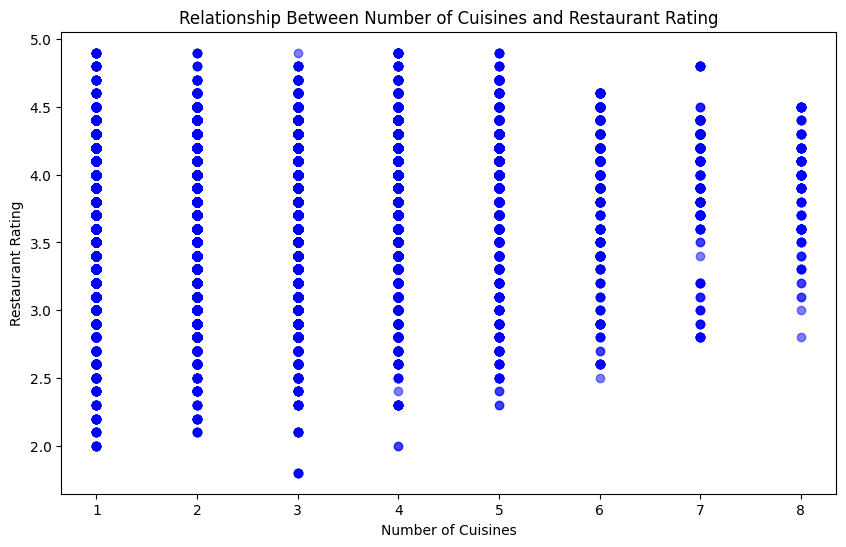

In [30]:

# Ensure 'rate' is treated as a string to extract numeric rating
df_cleaned['rate'] = df_cleaned['rate'].astype(str)

# Step 1: Extract the numeric part of the rating (e.g., '4.1' from '4.1/5')
df_cleaned['rating_numeric'] = df_cleaned['rate'].str.extract(r'(\d+\.\d+)').astype(float)

# Step 2: Ensure 'cuisines' column is a string and handle NaNs (fill NaNs with empty strings)
df_cleaned['cuisines'] = df_cleaned['cuisines'].fillna('')  # Replace NaNs with empty strings
df_cleaned['cuisines_count'] = df_cleaned['cuisines'].astype(str).str.split(',').apply(len)

# Step 3: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['cuisines_count'], df_cleaned['rating_numeric'], alpha=0.5, color='blue')

# Step 4: Add titles and labels
plt.title('Relationship Between Number of Cuisines and Restaurant Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Restaurant Rating')

# Step 5: Show the plot
plt.show()


Weak positive correlation 
Not a strong predictor, the number of cuisines offered by a restaurant does not have a major impact on its rating, 


*The number of cuisines alone does not explain a significant portion of the variation in restaurant ratings.*

//////////////////////////////////////////////////////////////////////////////////////////////////////////////

Is there a relationship between the average cost for two people and restaurant ratings?

           rate     price
rate   1.000000  0.381958
price  0.381958  1.000000


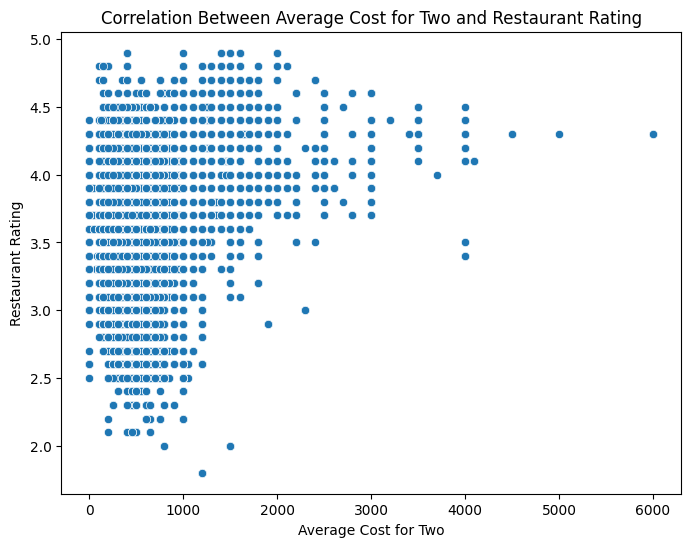

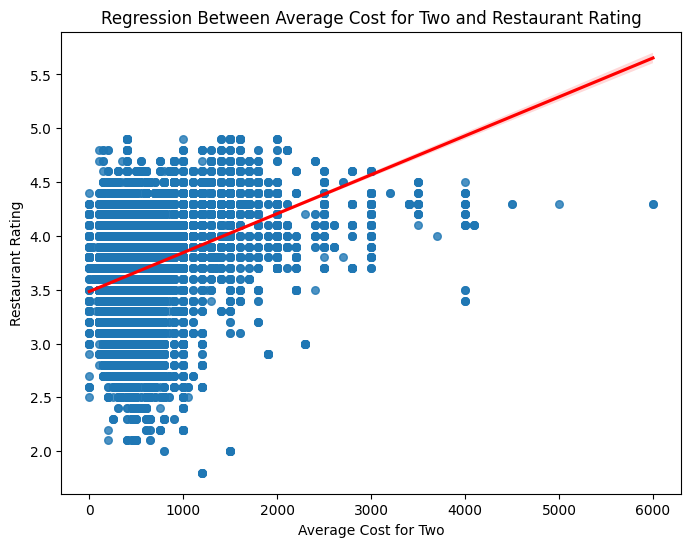

In [31]:
correlation = df_cleaned[['rate', 'price']].corr()

# Output the correlation result
print(correlation)

# Step 3: Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating_numeric', data=df_cleaned)
plt.title('Correlation Between Average Cost for Two and Restaurant Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Restaurant Rating')
plt.show()

# Optional: You can also use a regression line on the scatter plot for better insight
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='rating_numeric', data=df_cleaned, scatter_kws={'s': 30}, line_kws={"color": "red"})
plt.title('Regression Between Average Cost for Two and Restaurant Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Restaurant Rating')
plt.show()

In [32]:
# Step 1: Calculate correlation between price (average cost for two people) and rating
correlation = df['price'].corr(df['rate'])

# Step 2: Output the result
print(f"The correlation between average cost and rating is: {correlation:.4f}")


The correlation between average cost and rating is: 0.3090


A correlation of 0.3090 between average cost and restaurant ratings suggests a weak positive relationship. This means that there is a slight tendency for restaurants with higher costs to have higher ratings, but the relationship is not strong.

///////////////////////////////////////////////////////////////////////////



Do restaurants with table booking availability or online ordering tend to have higher ratings or more votes?

In [33]:
import pandas as pd

# Filter restaurants that have both table booking and online ordering
df_both_features = df[(df['book_table'] == 1) & (df['online_order'] == 1)]

# Filter restaurants that don't have both features
df_other = df[~((df['book_table'] == 1) & (df['online_order'] == 1))]

# Calculate average ratings for both groups
avg_rating_both = df_both_features['rate'].mean()
avg_rating_other = df_other['rate'].mean()

# Output the average ratings
print(f"Average Rating for restaurants with both table booking and online ordering: {avg_rating_both}")
print(f"Average Rating for restaurants without both features: {avg_rating_other}")


Average Rating for restaurants with both table booking and online ordering: 4.076057818659659
Average Rating for restaurants without both features: 2.894260310569377


C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\2401175031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rating_numeric', data=df_cleaned, palette='Set2')
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\2401175031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rating_numeric', data=df_cleaned, palette='Set2')


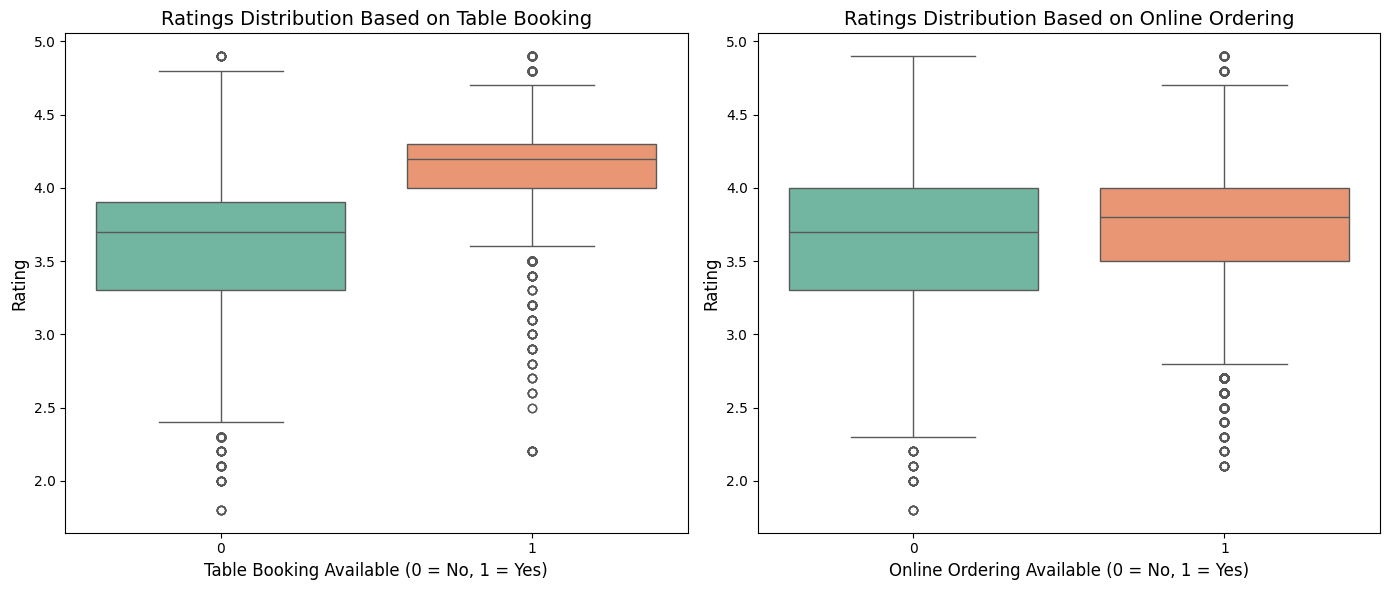

C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\2401175031.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='votes', data=df_cleaned, palette='coolwarm')
C:\Users\omarw\AppData\Local\Temp\ipykernel_3132\2401175031.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='votes', data=df_cleaned, palette='coolwarm')


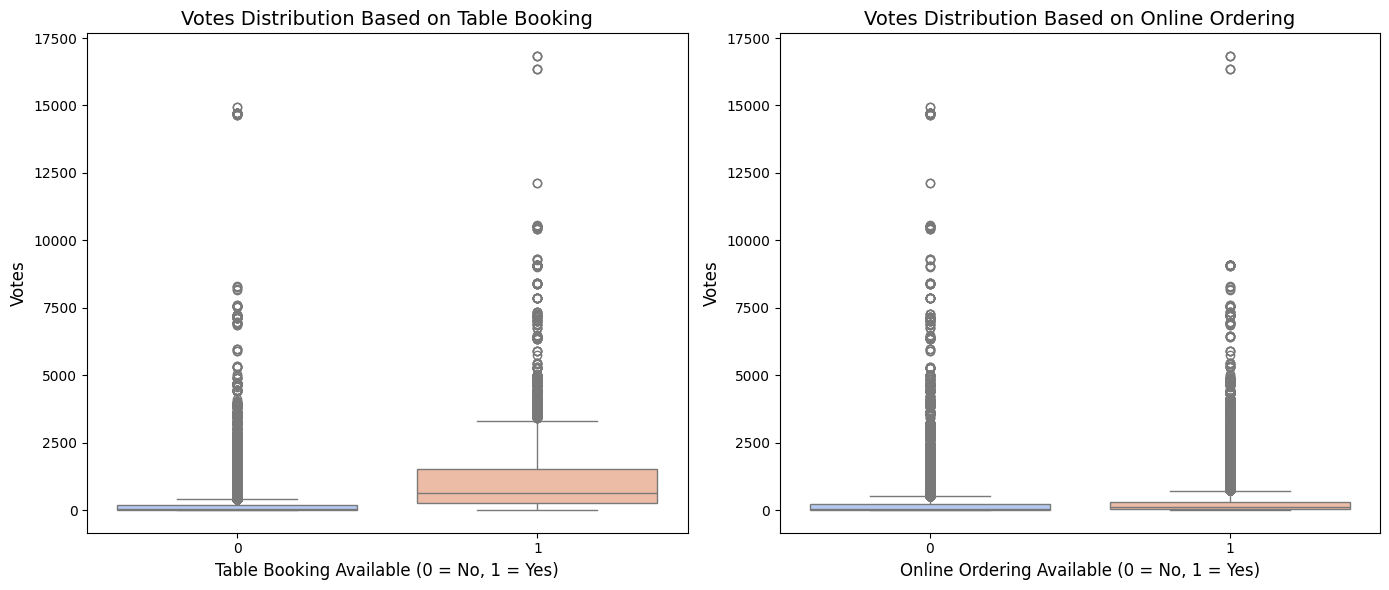

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for ratings based on table booking availability
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='book_table', y='rating_numeric', data=df_cleaned, palette='Set2')
plt.title('Ratings Distribution Based on Table Booking', fontsize=14)
plt.xlabel('Table Booking Available (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Boxplot for ratings based on online ordering
plt.subplot(1, 2, 2)
sns.boxplot(x='online_order', y='rating_numeric', data=df_cleaned, palette='Set2')
plt.title('Ratings Distribution Based on Online Ordering', fontsize=14)
plt.xlabel('Online Ordering Available (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Rating', fontsize=12)

plt.tight_layout()
plt.show()

# Repeat the same for votes if needed
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='book_table', y='votes', data=df_cleaned, palette='coolwarm')
plt.title('Votes Distribution Based on Table Booking', fontsize=14)
plt.xlabel('Table Booking Available (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Votes', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x='online_order', y='votes', data=df_cleaned, palette='coolwarm')
plt.title('Votes Distribution Based on Online Ordering', fontsize=14)
plt.xlabel('Online Ordering Available (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Votes', fontsize=12)

plt.tight_layout()
plt.show()


From the results:

Restaurants with both table booking and online ordering have an average rating of 4.08, which is significantly higher than...
Restaurants without both features, which have an average rating of 2.89.

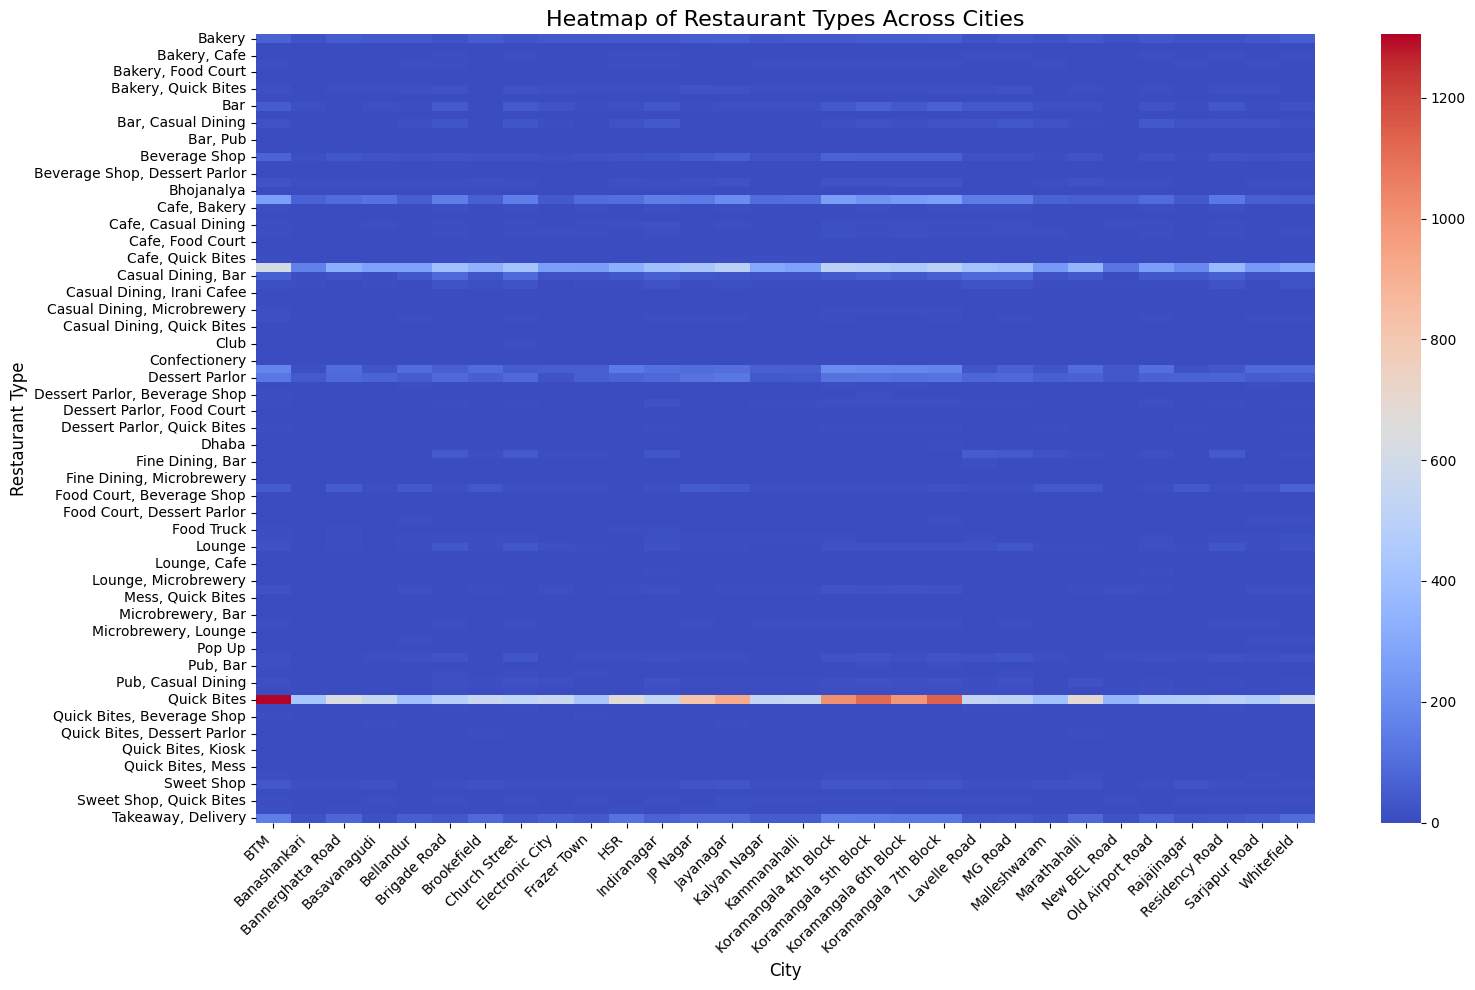

In [35]:
# karim
# research question 1: which types of restaurants are most commonly listed in each city?

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame that contains restaurant data

# Group by 'rest_type' and 'listed_in(city)', then count the number of occurrences
heatmap_data = df.groupby(['rest_type', 'listed_in(city)']).size().reset_index(name='count')

# Pivot the data for a heatmap
heatmap_data = heatmap_data.pivot(index='rest_type', columns='listed_in(city)', values='count').fillna(0)

# Create the heatmap with adjustments
plt.figure(figsize=(16, 10))

# Choose a different color map and adjust the color range for better contrast
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

# Set title and labels
plt.title('Heatmap of Restaurant Types Across Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Restaurant Type', fontsize=12)

# Rotate city labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()